### Open SSH And Velocity Data

In [1]:
import pandas as pd 
import numpy as np 
import xarray as xr 

import matplotlib.pyplot as plt

In [2]:
# Open the SSH dataset 
#source -> https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047
ds_ssh = xr.open_dataset("data/dataset-duacs-rep-global-merged-allsat-phy-l4_201405_202005.nc")

In [41]:
ds_ssh

<xarray.Dataset>
Dimensions:    (time: 2224, latitude: 41, longitude: 328)
Coordinates:
  * time       (time) datetime64[ns] 2014-05-01 2014-05-02 ... 2020-06-01
  * latitude   (latitude) float32 25.12 25.38 25.62 25.88 ... 34.62 34.88 35.12
  * longitude  (longitude) float32 278.1 278.4 278.6 278.9 ... 359.4 359.6 359.9
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [12]:
## Take a look on the dataset

In [42]:
sample = ds_ssh["sla"][0,:,:]

In [43]:
min(ds_ssh.sla.longitude)

<xarray.DataArray 'longitude' ()>
array(278.125, dtype=float32)
Coordinates:
    longitude  float32 278.1
Attributes:
    axis:                 X
    bounds:               lon_bnds
    long_name:            Longitude
    standard_name:        longitude
    units:                degrees_east
    valid_max:            359.875
    valid_min:            0.125
    _ChunkSizes:          50
    _CoordinateAxisType:  Lon

In [ ]:
#

In [3]:
# Converting the lat lon to -180 180
with xr.set_options(keep_attrs=True):
    ds_ssh = ds_ssh.assign({'longitude':(((ds_ssh.longitude + 180) % 360) - 180)})

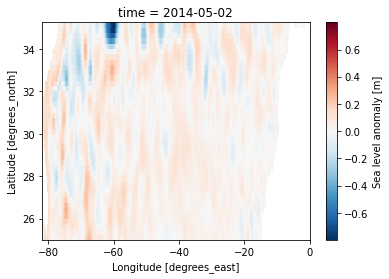

In [4]:
ds_ssh.sla.isel(time=1).plot(x='longitude')

### The downloaded file has more points that is needed. So we get a subset of original file...

In [5]:
# Subset uf Gulf Stream 
max_lon = -70
min_lon = -82

subset_lon = (ds_ssh.sla.longitude >= min_lon) & (ds_ssh.sla.longitude <= max_lon)

In [6]:
gulf_stream_ssh = ds_ssh.where(subset_lon, drop=True)

In [7]:
gulf_stream_ssh

<xarray.Dataset>
Dimensions:    (time: 2224, latitude: 41, longitude: 48)
Coordinates:
  * time       (time) datetime64[ns] 2014-05-01 2014-05-02 ... 2020-06-01
  * latitude   (latitude) float32 25.12 25.38 25.62 25.88 ... 34.62 34.88 35.12
  * longitude  (longitude) float32 -81.88 -81.62 -81.38 ... -70.62 -70.38 -70.12
Data variables:
    adt        (time, latitude, longitude) float64 0.2258 0.2311 ... 0.7483
    ugos       (time, latitude, longitude) float64 -0.2394 -0.2143 ... -0.1028
    vgos       (time, latitude, longitude) float64 -0.1098 -0.0996 ... 0.3729
    vgosa      (time, latitude, longitude) float64 -0.1276 -0.0758 ... 0.3656
    err        (time, latitude, longitude) float64 0.0197 0.0199 ... 0.0392
    sla        (time, latitude, longitude) float64 0.0627 0.0438 ... -0.0401
    ugosa      (time, latitude, longitude) float64 -0.1519 -0.1162 ... 0.0179
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

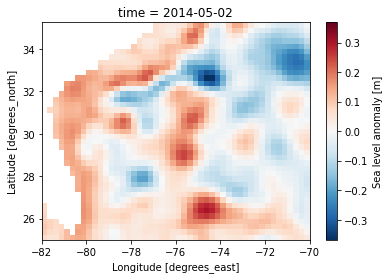

In [8]:
gulf_stream_ssh.sla.isel(time=1).plot(x='longitude')

In [9]:
gulf_stream_ssh.to_netcdf("data/ssh_data.nc")

In [10]:
fromdisk = xr.open_dataset("data/ssh_data.nc")
fromdisk

<xarray.Dataset>
Dimensions:    (time: 2224, latitude: 41, longitude: 48)
Coordinates:
  * time       (time) datetime64[ns] 2014-05-01 2014-05-02 ... 2020-06-01
  * latitude   (latitude) float32 25.12 25.38 25.62 25.88 ... 34.62 34.88 35.12
  * longitude  (longitude) float32 -81.88 -81.62 -81.38 ... -70.62 -70.38 -70.12
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [11]:
gulf_stream_ssh.identical(fromdisk)

True